In [ ]:
import os
os.chdir('drive/My Drive/MLProject_20202')

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from gensim.models.doc2vec import Doc2Vec
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from tqdm import tqdm
from sklearn.ensemble.forest import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, plot_confusion_matrix, f1_score, classification_report

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.ensemble.forest module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.ensemble. Anything that cannot be imported from sklearn.ensemble is now part of the private API.
  warnings.warn(message, FutureWarning)


In [ ]:
df_cat = pd.read_csv('Data/data_all_categorical.csv', encoding='utf-8')

y = df_cat.fraudulent

df_cat_no_target = df_cat.loc[:, df_cat.columns != 'fraudulent']

categorical_vectors = df_cat_no_target.to_numpy()

In [ ]:
df_text = pd.read_csv("Data/data_text_clean.csv", encoding='utf-8')
text_all = df_text['clean_text'].tolist()

In [ ]:
MODEL_TYPE = 'dm'
MODEL_OUTPUT = 100

In [ ]:
doc2vec_model = Doc2Vec.load(f"Model/Doc2Vec/doc2vec_pv_{MODEL_TYPE}_{MODEL_OUTPUT}.model")

In [ ]:
def get_context_vectors(doc2vec_model):
    context_vectors = np.empty((0, MODEL_OUTPUT))
    for i in df_text.index:
        features = doc2vec_model.infer_vector(text_all[i])
        context_vectors = np.append(context_vectors, np.expand_dims(features, axis=0), axis=0)
    return context_vectors

In [ ]:
context_vectors = get_context_vectors(doc2vec_model)

In [ ]:
X = np.concatenate((context_vectors, categorical_vectors), axis = 1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
def cross_validation(estimator):
    _, train_scores, test_scores = learning_curve(estimator, X_train, y_train, cv=10, n_jobs=-1, train_sizes=[1.0, ], scoring="accuracy")
    test_scores = test_scores[0]
    mean, std = test_scores.mean(), test_scores.std()
    return mean, std

def plot(title, xlabel, X, Y, error, ylabel = "Accuracy"):
    plt.xlabel(xlabel)
    plt.title(title)
    plt.grid()
    plt.ylabel(ylabel)
    
    plt.errorbar(X, Y, error, linestyle='None', marker='o')

100%|██████████| 4/4 [19:33<00:00, 293.30s/it]


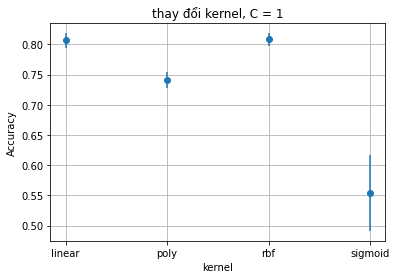

In [ ]:
title = "thay đổi kernel, C = 1"
xlabel = "kernel"
X_axis = []
Y_axis = []
error = []
mean_max = 0
svm_kernel = ""

for kernel in tqdm(['linear', 'poly', 'rbf', 'sigmoid']):
    # Với mỗi kernel được chọn, 
    # thực hiện xây dựng mô hình, huấn luyện và đánh giá theo cross-validation
    text_clf = SVC(kernel=kernel, C=1.0, class_weight='balanced')
    mean, std = cross_validation(text_clf)
    X_axis.append(kernel)
    Y_axis.append(mean)
    error.append(std)
    if (mean_max <= mean):
        mean_max = mean
        svm_kernel = kernel

# lưu kết quả ra file ảnh 
plot(title, xlabel, X_axis, Y_axis, error)
plt.savefig(f'Image/Doc2Vec/svm_change_kernel_{MODEL_TYPE}_{MODEL_OUTPUT}.png', bbox_inches='tight')
plt.show()

100%|██████████| 5/5 [24:52<00:00, 298.58s/it]


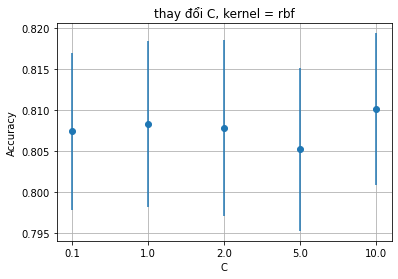

In [ ]:
title = "thay đổi C, kernel = " + str(svm_kernel)
xlabel = "C"
X_axis = []
Y_axis = []
error = []
mean_max = 0.0
svm_C = 0.0

for C in tqdm([.1, 1.0, 2.0, 5.0, 10.0]):
    # Với từng giá trị C nhận được, 
    # thực hiện xây dựng mô hình, huấn luyện và đánh giá theo cross-validation
    text_clf = SVC(kernel=svm_kernel, C=C, class_weight='balanced')
    mean, std = cross_validation(text_clf)
    X_axis.append(str(C))
    Y_axis.append(mean)
    error.append(std)
    if (mean_max <= mean):
        mean_max = mean
        svm_C = C

# lưu kết quả ra file ảnh
plot(title, xlabel, X_axis, Y_axis, error)
plt.savefig(f'Image/Doc2Vec/svm_change_C_{MODEL_TYPE}_{MODEL_OUTPUT}.png', bbox_inches='tight')
plt.show()

100%|██████████| 2/2 [01:36<00:00, 48.23s/it]


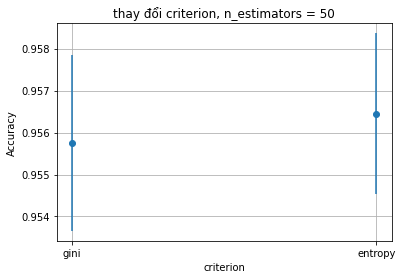

In [ ]:
title = "thay đổi criterion, n_estimators = 50"
xlabel = "criterion"
X_axis = []
Y_axis = []
error = []
mean_max = 0.0
rf_criterion = ""

for criterion in tqdm(["gini", "entropy"]):
    # Với mỗi criterion nhận được,
    # thực hiện xây dựng mô hình, huấn luyện và đánh giá theo cross-validation
    text_clf = RandomForestClassifier(criterion=criterion, n_estimators=50, class_weight='balanced')
    mean, std = cross_validation(text_clf)
    X_axis.append(str(criterion))
    Y_axis.append(mean)
    error.append(std)
    if (mean_max <= mean):
        mean_max = mean
        rf_criterion = criterion

# lưu kết quả ra file ảnh
plot(title, xlabel, X_axis, Y_axis, error)
plt.savefig(f'Image/Doc2Vec/RF_change_criterion_{MODEL_TYPE}_{MODEL_OUTPUT}.png', bbox_inches='tight')
plt.show()

In [ ]:
title = "thay đổi n_estimators, criterion = " + str(rf_criterion)
xlabel = "n_estimators"
X_axis = []
Y_axis = []
error = []
mean_max = 0.0
rf_estimators = 0.0

for n_estimators in tqdm([10, 50, 100, 300]):
    # Với từng giá trị n_estimators nhận được,
    # thực hiện xây dựng mô hình, huấn luyện và đánh giá theo cross-validation
    text_clf = RandomForestClassifier(criterion=rf_criterion, n_estimators=n_estimators, class_weight='balanced')
    mean, std = cross_validation(text_clf)
    X_axis.append(str(n_estimators))
    Y_axis.append(mean)
    error.append(std)
    if (mean_max <= mean):
        mean_max = mean
        rf_estimators = n_estimators

# lưu kết quả ra file ảnh
plot(title, xlabel, X_axis, Y_axis, error)
plt.savefig(f'Image/Doc2Vec/RF_change_N_{MODEL_TYPE}_{MODEL_OUTPUT}.png', bbox_inches='tight')
plt.show()

100%|██████████| 5/5 [01:48<00:00, 21.75s/it]


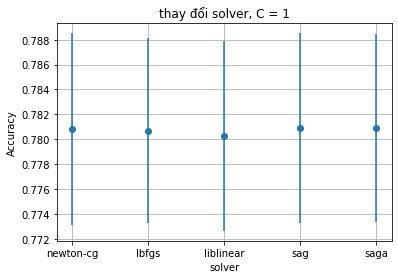

In [ ]:
title = "thay đổi solver, C = 1"
xlabel = "solver"
X_axis = []
Y_axis = []
error = []
mean_max = 0.0
lr_solver = ""

for solver in tqdm(["newton-cg", "lbfgs", "liblinear", "sag", "saga"]):
    # Với mỗi criterion nhận được,
    # thực hiện xây dựng mô hình, huấn luyện và đánh giá theo cross-validation
    text_clf = LogisticRegression(solver=solver, C=1, class_weight='balanced', max_iter=400)
    mean, std = cross_validation(text_clf)
    X_axis.append(str(solver))
    Y_axis.append(mean)
    error.append(std)
    if (mean_max <= mean):
        mean_max = mean
        lr_solver = solver

# lưu kết quả ra file ảnh
plot(title, xlabel, X_axis, Y_axis, error)
plt.savefig(f'Image/Doc2Vec/Logistic_change_solver_{MODEL_TYPE}_{MODEL_OUTPUT}.png', bbox_inches='tight')
plt.show()

In [ ]:
title = "thay đổi C, solver = " + str(lr_solver)
xlabel = "C"
X_axis = []
Y_axis = []
error = []
mean_max = 0.0
lr_C = 0.0


for C in tqdm([.1, 1.0, 2.0, 5.0, 10.0]):
    # Với từng giá trị C nhận được, 
    # thực hiện xây dựng mô hình, huấn luyện và đánh giá theo cross-validation
    text_clf = LogisticRegression(solver=lr_solver, C=C, class_weight='balanced', max_iter=400)
    mean, std = cross_validation(text_clf)
    X_axis.append(str(C))
    Y_axis.append(mean)
    error.append(std)
    if (mean_max <= mean):
        mean_max = mean
        lr_C = C

# lưu kết quả ra file ảnh
plot(title, xlabel, X_axis, Y_axis, error)
plt.savefig(f'Image/Doc2Vec/Logistic_change_C_{MODEL_TYPE}_{MODEL_OUTPUT}.png', bbox_inches='tight')
plt.show()

In [ ]:
svm_ = SVC(kernel=svm_kernel, C=svm_C, class_weight='balanced')
rf = RandomForestClassifier(criterion=rf_criterion, n_estimators=rf_estimators, class_weight='balanced')
logistic = LogisticRegression(solver=lr_solver, C=lr_C, class_weight='balanced', max_iter=400)

# Huấn luyện các mô hình trên tập dữ liệu train đầy đủ
svm_.fit(X_train, y_train)
rf.fit(X_train, y_train)
logistic.fit(X_train, y_train)

In [ ]:
import xgboost as xgb

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2)

In [ ]:
# number of negative/positive class in dataser
neg = sum(y==0)
pos = sum(y==1)
print(f'{neg} {pos}')

In [ ]:
param_init = {
    "objective": "binary:logistic",
    "booster": "gbtree",
    "max_depth": 4, # default: 3 only for depthwise
    "n_estimators": 1000, # default: 500
    "learning_rate": 0.025, # default: 0.05
    "subsample": 0.7,
    "colsample_bytree": 0.6,  # default:  1.0
    "colsample_bylevel": 0.5, # default: 1.0
    "random_state": 0,
    "scale_pos_weight": neg/pos,
 
    #
    "silent": True,
    "n_jobs": 16, 
 
    #
    "tree_method": "hist", # default: auto
    "grow_policy": "lossguide", # default depthwise
}
 
param_fit = {
    "eval_metric": ["rmse", "logloss", "auc", "aucpr"],
    "early_stopping_rounds": 500, # default: 100
    "verbose": 200,
    "eval_set": [(X_train, y_train), (X_val, y_val), (X_test, y_test)]
}
 
xgb_model = xgb.XGBClassifier(**param_init)
xgb_model.fit(X_train, y_train, **param_fit)
evals_result = xgb_model.evals_result()

[0]	validation_0-rmse:0.495116	validation_0-logloss:0.683424	validation_0-auc:0.824178	validation_0-aucpr:0.191242	validation_1-rmse:0.495161	validation_1-logloss:0.683514	validation_1-auc:0.753314	validation_1-aucpr:0.194207	validation_2-rmse:0.494984	validation_2-logloss:0.683164	validation_2-auc:0.778872	validation_2-aucpr:0.167608
Multiple eval metrics have been passed: 'validation_2-aucpr' will be used for early stopping.

Will train until validation_2-aucpr hasn't improved in 500 rounds.
[200]	validation_0-rmse:0.299788	validation_0-logloss:0.320094	validation_0-auc:0.961729	validation_0-aucpr:0.606458	validation_1-rmse:0.319516	validation_1-logloss:0.348957	validation_1-auc:0.86476	validation_1-aucpr:0.378186	validation_2-rmse:0.312664	validation_2-logloss:0.340361	validation_2-auc:0.851092	validation_2-aucpr:0.383557
[400]	validation_0-rmse:0.244377	validation_0-logloss:0.228206	validation_0-auc:0.98722	validation_0-aucpr:0.799362	validation_1-rmse:0.280612	validation_1-logloss

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

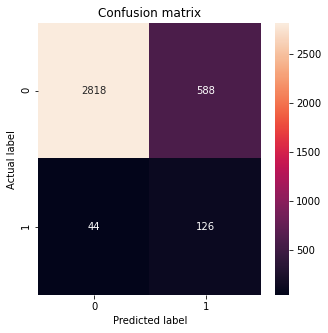

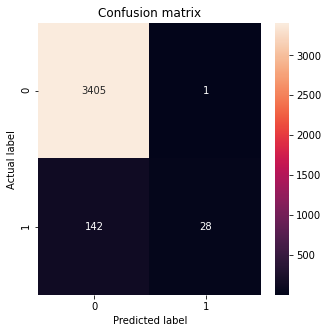

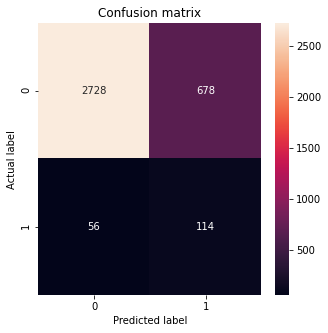

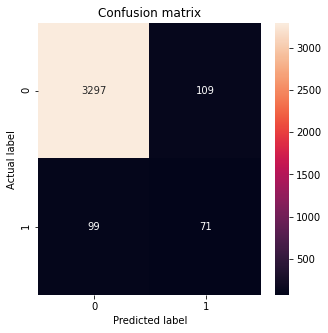

In [116]:
for clf, clf_dict in zip([svm_, rf, logistic, xgb_model], ['svm', 'rf', 'logistic', 'xgboost']):
    cm = confusion_matrix(y_test, clf.predict(X_test) > 0.5)
    plt.figure(figsize=(5,5))
    sns.heatmap(cm, annot=True, fmt="d")
    plt.title('Confusion matrix')
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')
    plt.savefig(f'Result/Doc2Vec/CM/{clf_dict}_{MODEL_TYPE}_cm.png')
    plt.show()

In [ ]:
import pickle

In [ ]:
# store models
for clf, clf_dict in zip([svm_, rf, logistic, xgb_model], ['svm', 'rf', 'logistic', 'xgboost']):
    with open(f'Model/Doc2Vec/Classification/{MODEL_TYPE}_{clf_dict}.pkl', 'wb') as file:
        pickle.dump(clf, file)